## Seasonal Statistics

For this dataset, let's plot the data by using a bar chart with error bars. First, let's load our dataset and add a coordinate for temperature.

In [1]:
import xarray as xarr

data = xarr.open_dataset("./data/clipped_daily_single_1988.nc")
data["t2m_celsius"] = data["t2m"] - 273.15

Now, we can process the data for each season and add seasonal labels.

In [ ]:
seasonal_data  = data.assign_coords(season=data["valid_time"].dt.season)

# returns data array with four objects - temperature
seasonal_means_temp = seasonal_data["t2m_celsius"].groupby("season").mean(...) # need to collapse other dimensions to ensure we're not calculating the mean across every lat and lon
seasonal_stds_temp = seasonal_data["t2m_celsius"].groupby("season").std(...)

seasonal_means_precipitation = seasonal_data["tp"].groupby("season").mean(...)
seasonal_stds_precipitation = seasonal_data["tp"].groupby("season").std(...)

season_labels = ["Winter", "Spring", "Summer", "Fall"]
seasons = ["DJF", "MAM", "JJA", "SON"] # xarray season labels

Finally, we need to calculate the means and standard deviations.

In [3]:
# temperature
means_temp = []
for season in seasons:
    means_temp.append(seasonal_means_temp.sel(season=season).values)

stds_temp = []
for season in seasons:
    stds_temp.append(seasonal_stds_temp.sel(season=season).values)

# precipitation
means_precipitation = []
for season in seasons:
    means_precipitation.append(seasonal_means_precipitation.sel(season=season).values)

stds_precipitation = []
for season in seasons:
    stds_precipitation.append(seasonal_stds_precipitation.sel(season=season).values)


Now, we can plot the data as a bar graph with +- 1 std.

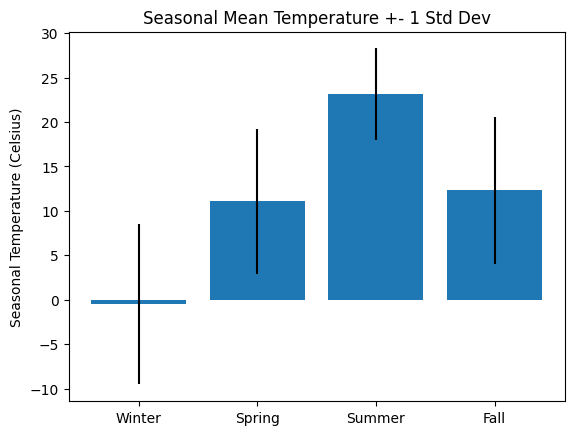

In [4]:
import matplotlib.pyplot as plot

plot.bar(season_labels, means_temp, yerr=stds_temp)
plot.ylabel("Seasonal Temperature (Celsius)")
plot.title("Seasonal Mean Temperature +- 1 Std Dev")
plot.savefig("./plots/Seasonal_Statistics_Daily_Single_Temperature_1988.png")
plot.show()

And now, the same for precipitation.

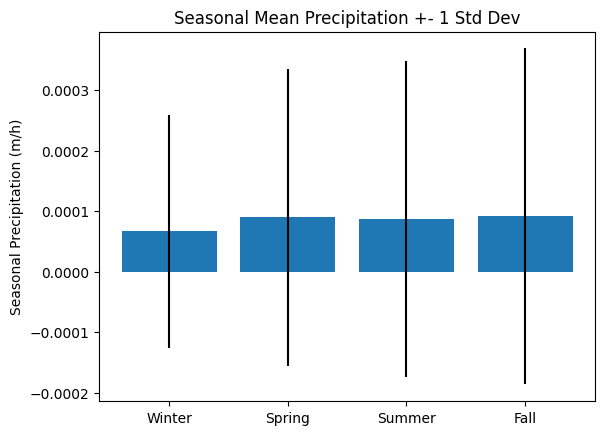

In [5]:
plot.bar(season_labels, means_precipitation, yerr=stds_precipitation)
plot.ylabel("Seasonal Precipitation (m/h)")
plot.title("Seasonal Mean Precipitation +- 1 Std Dev")
plot.savefig("./plots/Seasonal_Statistics_Daily_Single_Precipitation_1988.png")
plot.show()